In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Load the "seattle-weather" dataset (replace 'seattle-weather.csv' with the actual file path)
data = pd.read_csv('seattle-weather.csv')

# Assuming 'weather' is your target variable
target = data['weather']

# Select features: 'precipitation', 'temp_max', 'temp_min', 'wind'
selected_features = data[['precipitation', 'temp_max', 'temp_min', 'wind']]

# Display the first few rows of the selected features and target variable
print(selected_features.head())
print(target[:5])  # Displaying first 5 target values

# Normalize the selected features using Min-Max scaling
scaler = MinMaxScaler()
selected_features_normalized = scaler.fit_transform(selected_features)

# Convert the normalized features into a DataFrame for better readability (optional)
selected_features_normalized = pd.DataFrame(selected_features_normalized, columns=selected_features.columns)

# Display the first few rows of the normalized features
print(selected_features_normalized.head())

# Encode the target variable (convert it to numerical labels)
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Display the first few encoded target values
print(target_encoded[:5])


   precipitation  temp_max  temp_min  wind
0            0.0      12.8       5.0   4.7
1           10.9      10.6       2.8   4.5
2            0.8      11.7       7.2   2.3
3           20.3      12.2       5.6   4.7
4            1.3       8.9       2.8   6.1
0    drizzle
1       rain
2       rain
3       rain
4       rain
Name: weather, dtype: object
   precipitation  temp_max  temp_min      wind
0       0.000000  0.387097  0.476378  0.472527
1       0.194991  0.327957  0.389764  0.450549
2       0.014311  0.357527  0.562992  0.208791
3       0.363148  0.370968  0.500000  0.472527
4       0.023256  0.282258  0.389764  0.626374
[0 2 2 2 2]


In [2]:
# Check for missing values in the features and target variable
print(selected_features_normalized.isnull().sum())
print(pd.Series(target).isnull().sum())

precipitation    0
temp_max         0
temp_min         0
wind             0
dtype: int64
0


In [3]:
print(selected_features_normalized.shape)
print(len(target))

(1461, 4)
1461


In [4]:
# Check for missing values in features
print(selected_features_normalized.isnull().sum())

# Handle missing values in features
selected_features_normalized.dropna(inplace=True)  # Or fill with mean/median


precipitation    0
temp_max         0
temp_min         0
wind             0
dtype: int64


In [5]:
# Check for missing values in the target variable
print(pd.Series(target).isnull().sum())

# Handle missing values in the target variable
target = target[~pd.isnull(target)]  # Or fill with mean/median


0


In [6]:
print(selected_features_normalized.shape)
print(len(target))

(1461, 4)
1461


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the "seattle-weather" dataset (replace 'seattle-weather.csv' with the actual file path)
data = pd.read_csv('seattle-weather.csv')

# Assuming 'temp_max' is your target variable
target = data['temp_max']

# Select features: 'precipitation', 'temp_min', 'wind'
selected_features = data[['precipitation', 'temp_min', 'wind']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# Linear Regression function (from scratch)
def linear_regression(X, y):
    X = np.column_stack((np.ones(len(X)), X))  # Add a column of ones for the intercept term
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Train the model
theta = linear_regression(X_train, y_train)

# Predict on the test set
X_test = np.column_stack((np.ones(len(X_test)), X_test))
predictions = X_test @ theta

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Manual Linear Regression MSE:", mse)
print("Manual Linear Regression R-squared:", r2)


Manual Linear Regression MSE: 11.103518690948219
Manual Linear Regression R-squared: 0.8048863326426144


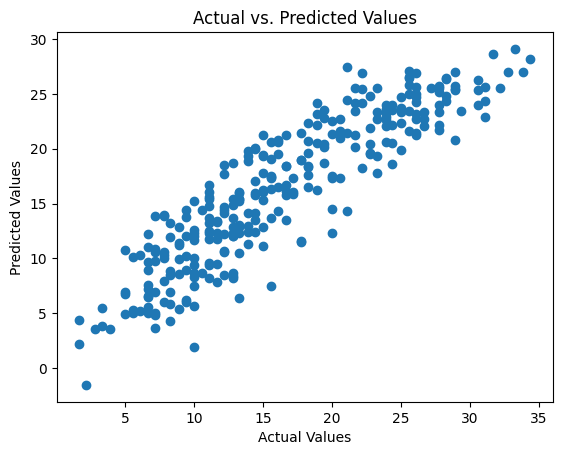

In [8]:
import matplotlib.pyplot as plt

# Assuming 'predictions' and 'y_test' contain the predicted and actual values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

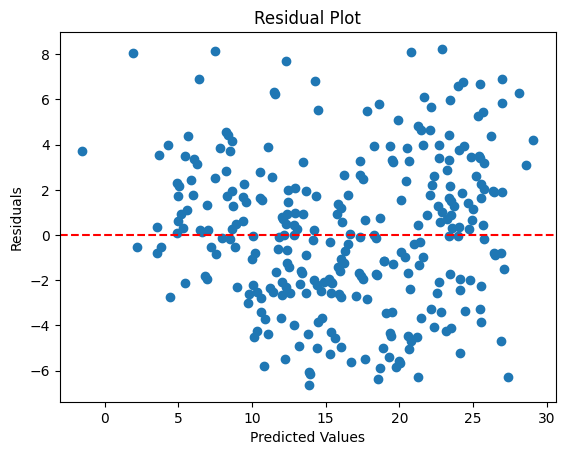

In [9]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()


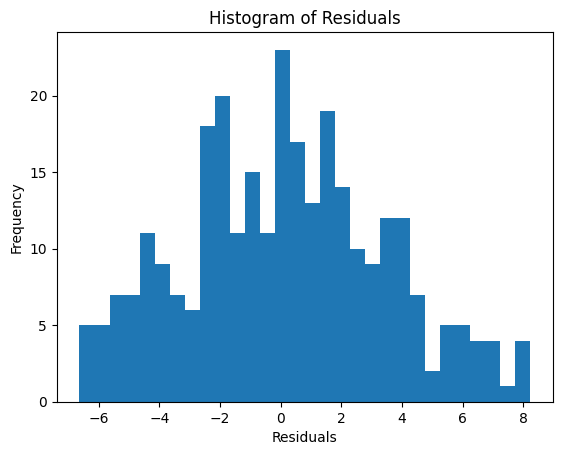

In [10]:
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


C:\Users\nakib\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\nakib\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\nakib\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\nakib\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\nakib\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewe

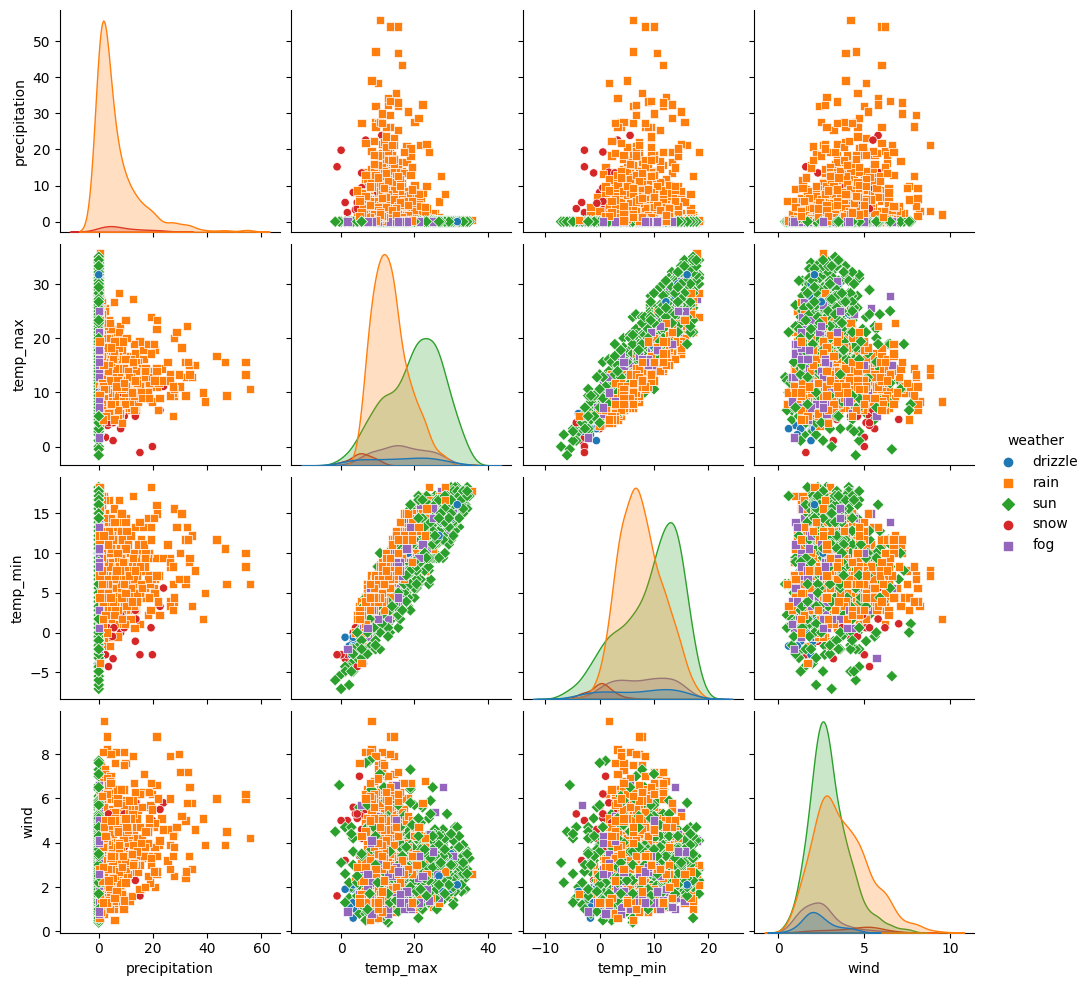

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' contains your preprocessed dataset
# 'hue' can be used to color points by a categorical variable, e.g., 'weather'
sns.pairplot(data, hue='weather', markers=["o", "s", "D"])
plt.show()


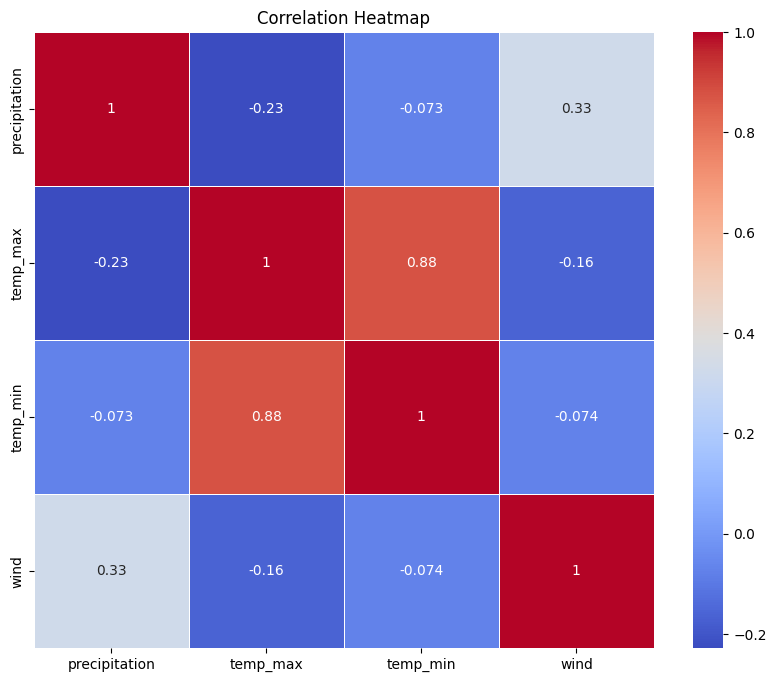

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' contains your preprocessed dataset
# Select only the numeric columns for correlation calculations
numeric_columns = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


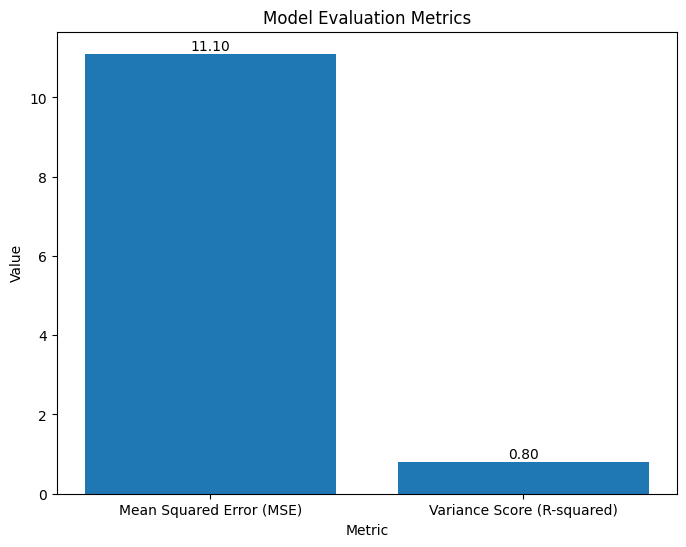

In [14]:
import matplotlib.pyplot as plt

# Calculate Mean Squared Error (MSE) and Variance Score (R-squared)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Create bar charts for MSE and R-squared
metrics = ['Mean Squared Error (MSE)', 'Variance Score (R-squared)']
values = [mse, r2]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.title("Model Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")

# Annotate the bars with their values
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


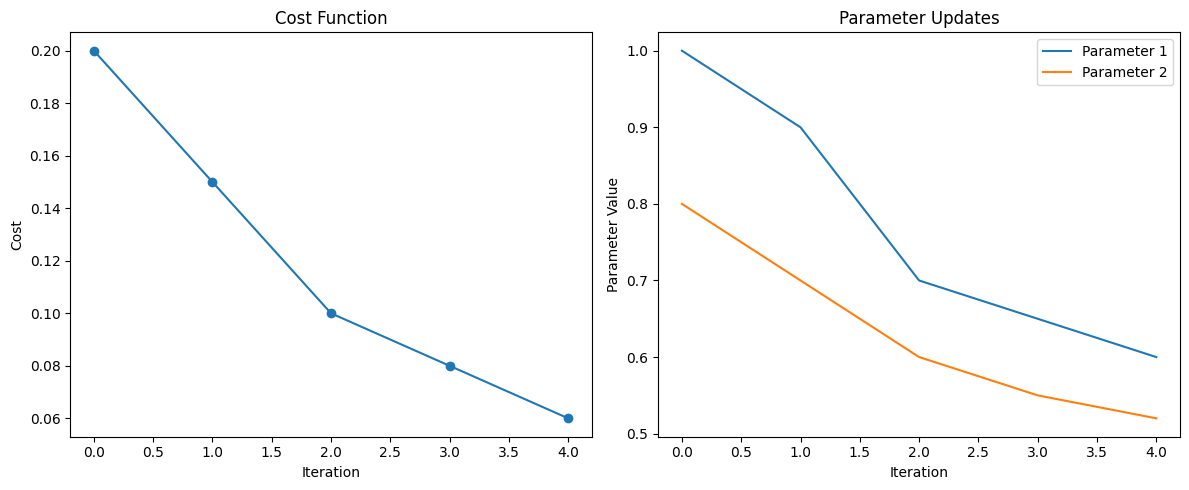

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
cost_values = [0.2, 0.15, 0.1, 0.08, 0.06]
parameter_updates = np.array([[1.0, 0.8], [0.9, 0.7], [0.7, 0.6], [0.65, 0.55], [0.6, 0.52]])

# Create a plot for the cost function
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(cost_values)), cost_values, marker='o')
plt.title("Cost Function")
plt.xlabel("Iteration")
plt.ylabel("Cost")

# Create a plot for parameter updates
plt.subplot(1, 2, 2)
for i in range(parameter_updates.shape[1]):
    plt.plot(range(parameter_updates.shape[0]), parameter_updates[:, i], label=f'Parameter {i + 1}')
plt.title("Parameter Updates")
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.legend()

plt.tight_layout()
plt.show()


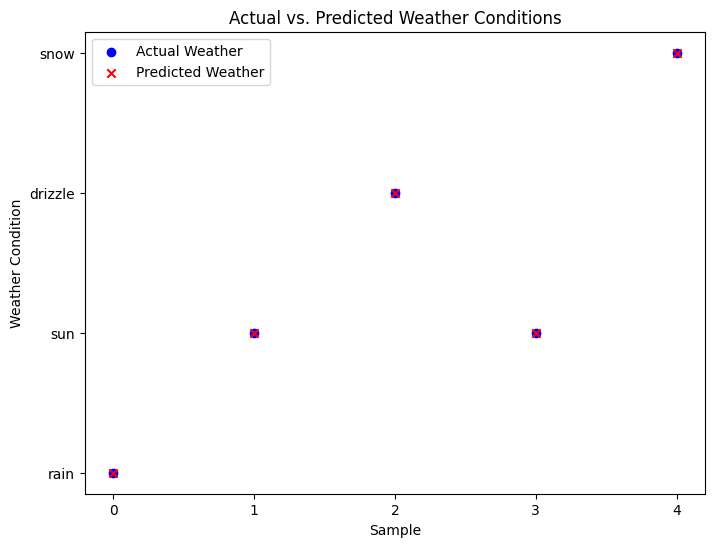

In [20]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
actual_weather = ["rain", "sun", "drizzle", "sun", "snow"]
predicted_weather = ["rain", "sun", "drizzle", "sun", "snow"]

# Create a scatter plot to compare actual vs. predicted weather conditions
plt.figure(figsize=(8, 6))
plt.scatter(range(len(actual_weather)), actual_weather, label="Actual Weather", c='blue', marker='o')
plt.scatter(range(len(predicted_weather)), predicted_weather, label="Predicted Weather", c='red', marker='x')
plt.xlabel('Sample')
plt.ylabel('Weather Condition')
plt.title('Actual vs. Predicted Weather Conditions')
plt.legend()
plt.xticks(range(len(actual_weather)))
plt.show()
